# Introduction




## Summary
In the dataset, I use 243 instances, in the year 2012, that cover forest fires across two regions of Algeria. I explored some relations and then I proceeded to build two models and 1 PCA logistic regression model to predict when a forest fire might happen. Then compared the results and evaluated the models.

### Objective
The main objective of this study is to create a model that would be able to predict when a forest fire is about to happen in Algeria in order to prevent them from happening before, they start.

### Information about forest fires
We are continuously seeing more forest fires everywhere around the world each year, this can be traced directly to global warming. Dry landscapes are more susceptible to Forrest fires. Forest fires lead to more global warming as they emit substantial amounts of CO2 as well as losing plants who take in CO2, this leads to the "fire-climate feedback loop".

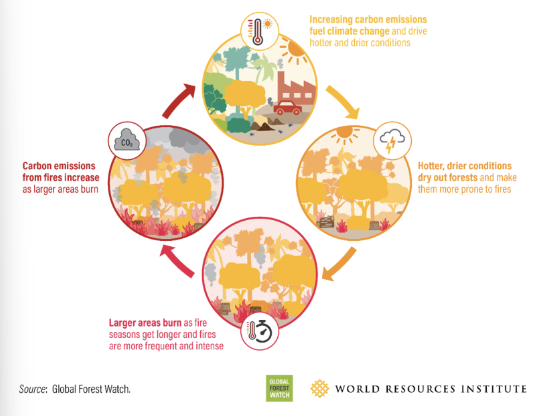

## Why do we need to be able to predict forest fires?
According to the National Centers for Environmental Information (USA), over 7.5 million acres of wildfires in 2022.
It is important to predict forest fires before they happen as preventing them could lead to saving the environment for the obvious reason, but also the lives and properties lost, the significant decrease in soil quality. As well as the economic price of extinguishing the fires, the timber lost to the fire. There are many ways governments could prevent a forest fire such as placing laws to temporarily limit human activity, prepare surrounding communities for it in case they were unable to contain it. Most importantly, resources need to be available to extinguish any fires before spreading, resources include but not limited to extinguishing chemicals, special vehicles, firefighters, and rescue teams.




---



# Data Description and Exploratory analysis



The data in the CSV file does not include the labels so I added them manually and printed out the table.

Description for attributes:
- Day
- Month
- Temperature (Temp): noon temperature that day in Celsius degrees 22 to 42.
- Relative Humidity (RH): s a measure of the moisture content in the air relative to the maximum amount of moisture the air can hold at a given temperature. Expressed as a percentage % 21 to 90. ***` (NOTE: If the rate of increase in temperature is faster than the rate of increase in water vapor content, then relative humidity would likely decrease) `***
- Weather Speed (Ws): weather speed in Km/hr: 6 to 29.
- Rain: total day in mm: 0 to 16.8.
- Fine Fuel Moisture code (FFMC): is a numeric rating representing the moisture content of litter and other cured fine fuels (dead leaves, twigs, and grass). The higher this number gets indicates drier conditions.
Measured in the range of 28.6 to 92.5.
- Duff Moisture Code (DMC): numeric rating indicates average moisture content of loosely compacted organic layers (roots, microorganisms, fungi, etc.). The higher this number gets indicates drier conditions. Measured in the range of 1.1 to 65.9.
- Drought Code (DC): numeric rating of average moisture content of deep compact layers (large log, and deep duff).
Higher DC values correlate with increased fire danger. Measured in the range of 7 to 220.4.
- Initial Spread Index (ISI): numeric rating of the expected rate of fire spread. It depends on the FFMC and wind speed. A higher ISI indicates faster fire spread. Measured in the range of 0 to 18.5.
- Buildup Index (BUI): number demonstrating the total amount of fuel available for combustion. Depends on Duff Moisture Code (DMC) and the Drought Code (DC).
Measured in the range of 1.1 to 68.
- Fire Weather Index (FWI): numeric rating of fire intensity. Combines the Initial Spread Index (ISI) and the Buildup Index (BUI). Measured in the range of 0 to 31.1.
- Target: categories:"Fire" or "Not Fire".

## Objective:
Alot of the attributes are related to each other in some way or the other, for example having high temperatures could result in lower relative humidity.
Additionally, some attributes are calculations of other attributes example:
Fire Weather Index or build up index.
My objective here is to visualize and observe these relations and then build a model that predicts when there is a fire.










---

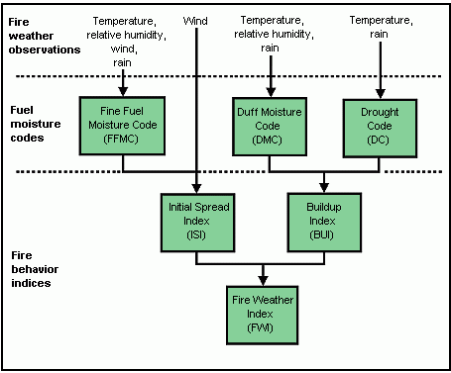

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree

In [66]:
# Read the CSV file into a DataFrame
# Define attribute labels
labels = ['Day', 'Month', 'Temp','RH','Ws','Rain',
          'Fine Fuel Mositure Code (FFMC)',
          'Duff Moisture Code (DMC)', 'Drought code(DC)',
          'Initial Spread Index (ISI)', 'Buildup Index (BUI)',
          'Fire Weather Index(FWI)', 'Target']
df = pd.read_csv('/content/ForestFire.csv', header = None, names = labels)

# Assign attribute labels to DataFrame columns
df.columns = labels

display(df)

,Day,Month,Temp,RH,Ws,Rain,Fine Fuel Mositure Code (FFMC),Duff Moisture Code (DMC),Drought code(DC),Initial Spread Index (ISI),Buildup Index (BUI),Fire Weather Index(FWI),Target
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,notfire
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire


In [67]:
print(df.info())
df_numeric = df.drop(columns=['Month', 'Day', 'Target'])
# Summary statistics for numeric features to make sure we have no missing data
df_numeric.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Day                             243 non-null    int64  
 1   Month                           243 non-null    int64  
 2   Temp                            243 non-null    int64  
 3   RH                              243 non-null    int64  
 4   Ws                              243 non-null    int64  
 5   Rain                            243 non-null    float64
 6   Fine Fuel Mositure Code (FFMC)  243 non-null    float64
 7   Duff Moisture Code (DMC)        243 non-null    float64
 8   Drought code(DC)                243 non-null    float64
 9   Initial Spread Index (ISI)      243 non-null    float64
 10  Buildup Index (BUI)             243 non-null    float64
 11  Fire Weather Index(FWI)         243 non-null    float64
 12  Target                          243 

,Temp,RH,Ws,Rain,Fine Fuel Mositure Code (FFMC),Duff Moisture Code (DMC),Drought code(DC),Initial Spread Index (ISI),Buildup Index (BUI),Fire Weather Index(FWI)
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


We have made sure we dont have any missing values. As well as provide a mean, max, std,
 min, and percentage distribution.
This is useful for us to be assured that we have a proper data set, and that it is balanced.

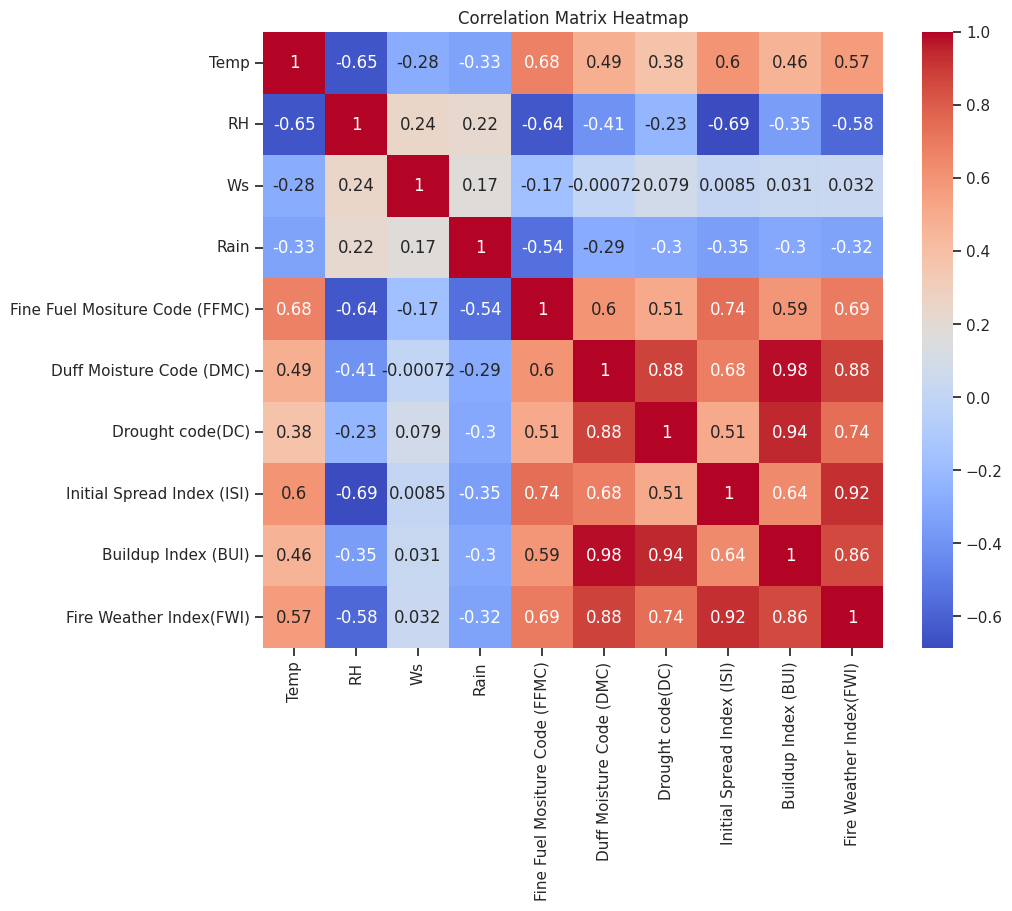

In [68]:

matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Correlation matrix interpretation:
I am highlighting the most  noticable correlations.
Positive Correlations (ordered from high to low):
- Temperature: FFMC, ISI, FWI, BUI, DMC, DC.
- Fire Weather Index: BUI, ISI, DMC, DC, FFMC, Temp.
- Buildup Index: DMC, DC, FWI, ISI, FFMC.
Negative Correlations (ordered from high to low):
- Relative Humidty: ISI, Temp, FFMC, FWI, DMC,BUI.
- Rain: FFMC, ISI, Temp, FWI, BUI, ISI, DMC.

Now, they all seem logical since more humidity/moisture would lessen the chances of forest fires and I have seen the correlations I expected.




In [69]:
mean_temp_by_month = df.groupby("Month")["Temp"].mean()

print(mean_temp_by_month)

Month
6    30.800000
7    32.983607
8    35.338710
9    29.366667
Name: Temp, dtype: float64


8th month is very hot and they need to be the most cautious during that time


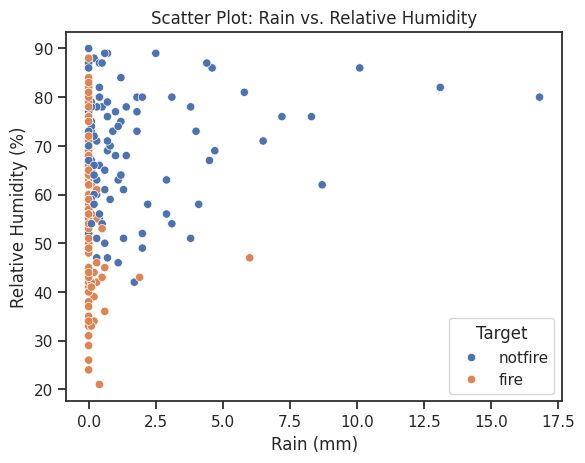

In [70]:
sns.scatterplot(x="Rain", y="RH", hue="Target", data=df)
plt.title("Scatter Plot: Rain vs. Relative Humidity")
plt.xlabel("Rain (mm)")
plt.ylabel("Relative Humidity (%)")
plt.show()

In this scatter plot we observe the relation between rain and relative humidty to 'fire' or 'notfire'.
A prominant observation here is that the samples are spread all along the Y-axis, although having high relative humidty reduces the risk of forrest fires. It is not the only factor and definitly not the most important.

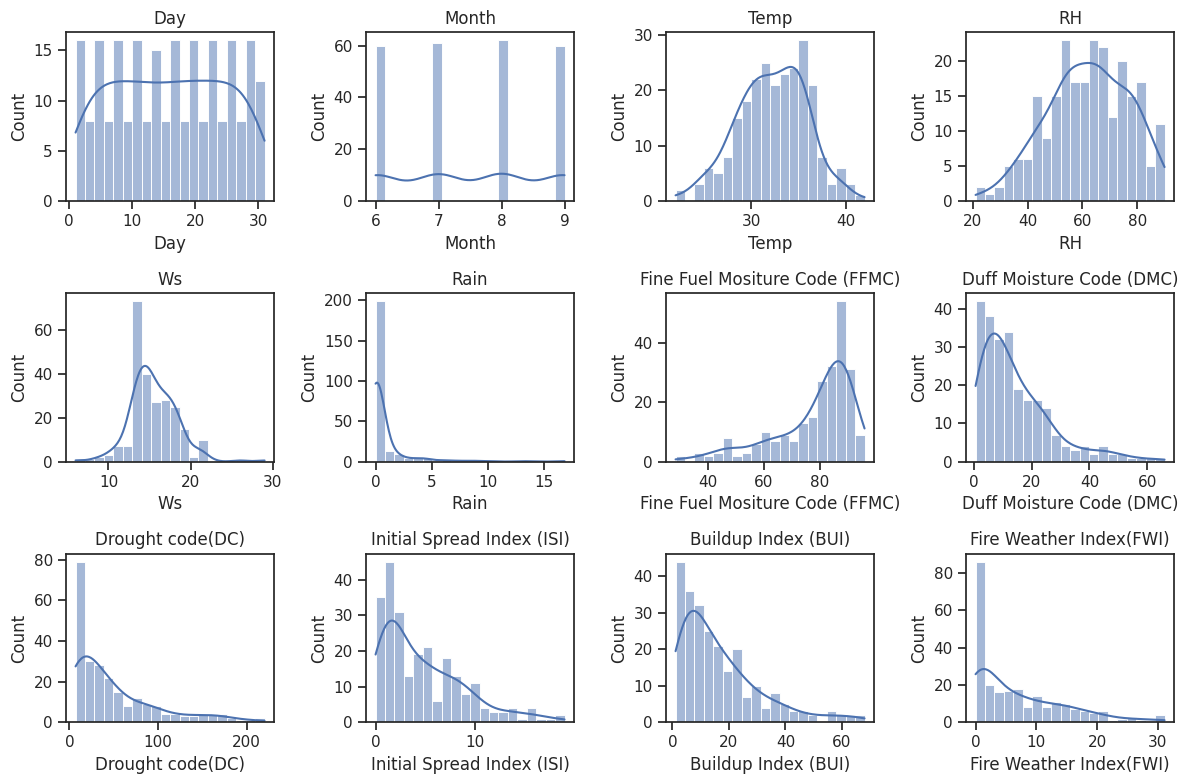

In [71]:
plt.figure(figsize=(12, 8))
for col in df.columns[:-1]:
    plt.subplot(3, 4, df.columns.get_loc(col) + 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Demonstration of distribution of attributes along the data set, alot of them are skewed and it is not balanced because it was naturally collected in a limited time duration.



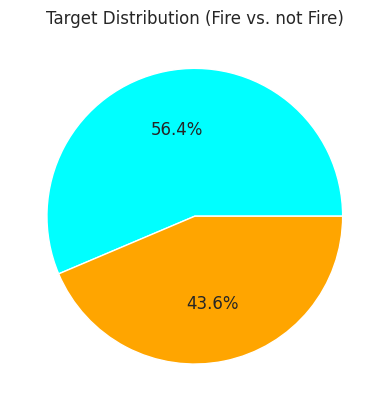

In [72]:

plt.pie(df['Target'].value_counts(), autopct="%1.1f%%", colors=["cyan", "orange"])
plt.title("Target Distribution (Fire vs. not Fire)")
plt.show()

Cyan is notfire and orange is fire

It is generally disirable for these two classes to be equal however, we are creating a model to determine when to expect a fire  based on a time period of 4 months. In this case we would much rather have a naturally balanced based on the occurancess during that duration.



---



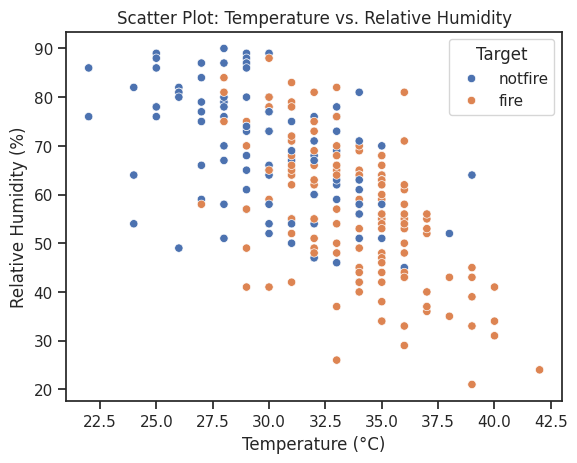

In [73]:

sns.scatterplot(x="Temp", y="RH", hue="Target", data=df)
plt.title("Scatter Plot: Temperature vs. Relative Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Relative Humidity (%)")
plt.show()

Here we can observe the relationship between temperature and relative humidity which based on the correlation matrix turned out to be the most influencing factors towards other attributes. We can see in the scatter plot above that as the temperature increases all the data points indicate there is a fire.
We could alo notice the inverse relationship between temperature and relative humidity.

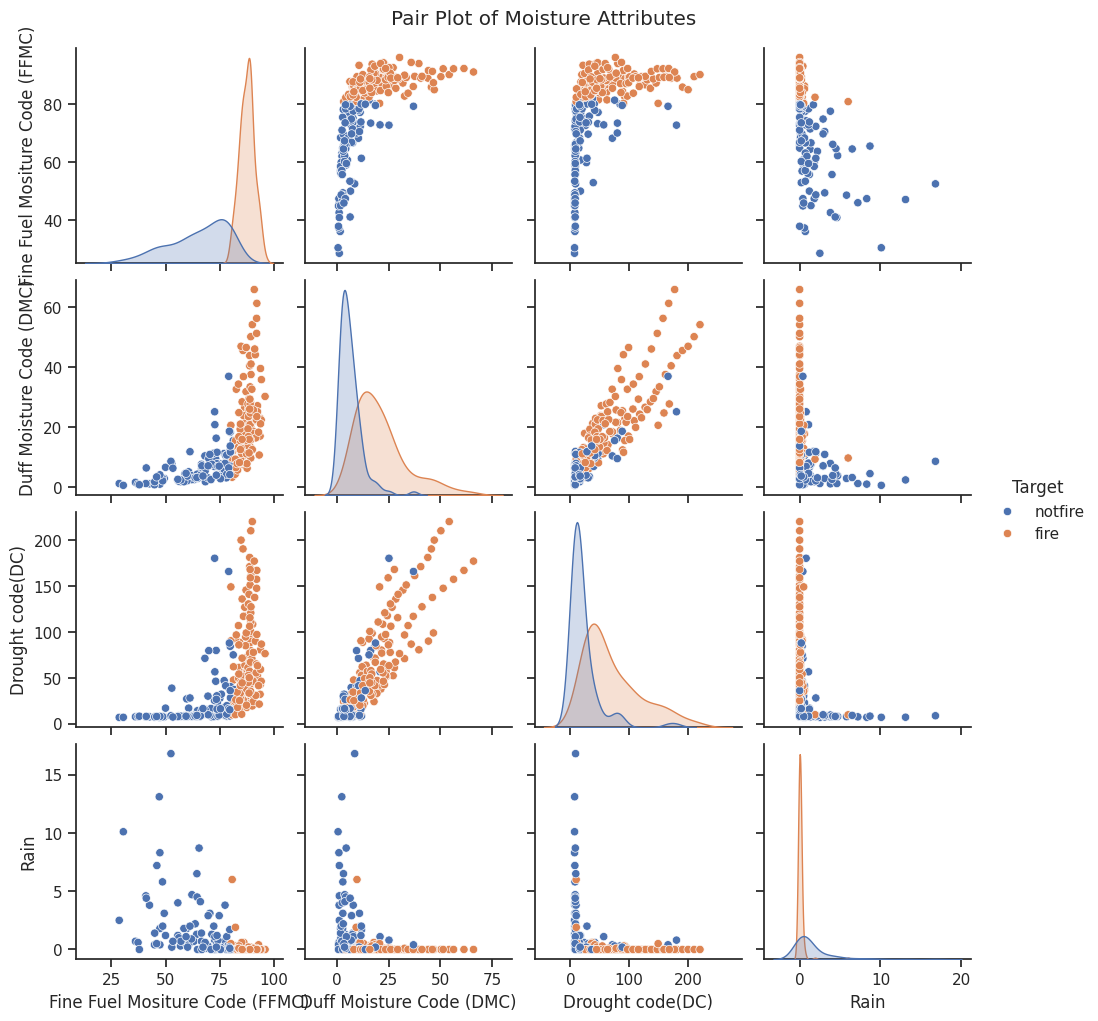

In [74]:
# Subset of the  dataframe to include only the relevant columns to be more focused
moisture_df = df[[ 'Fine Fuel Mositure Code (FFMC)',
          'Duff Moisture Code (DMC)', 'Drought code(DC)',
           'Target', 'Rain']]
# Create the pair plot
sns.pairplot(moisture_df, hue='Target')

# Add a title
plt.suptitle("Pair Plot of Moisture Attributes", y=1.02)

# Show the plot
plt.show()

Moisture codes have a clear inverse relationship with rain and it assures once more that the dry conditons make a good environment for forest fires. Almost all fire instances happened when we have 0 mm  of rain.

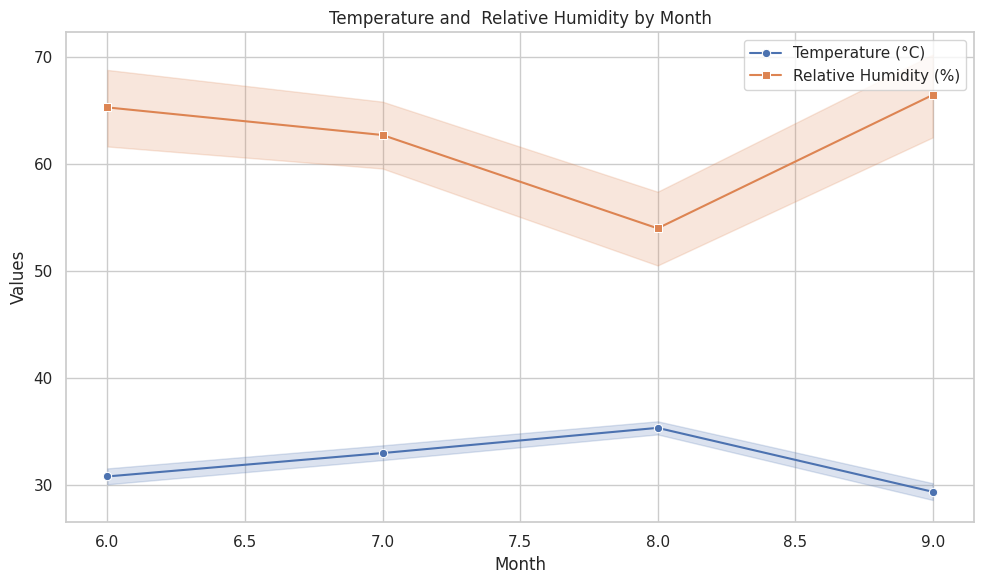

In [75]:
sns.set(style="whitegrid")

# Create a line plot for temperature and humidity by month
plt.figure(figsize=(10, 6))

# Line plot for temperature
sns.lineplot(x="Month", y="Temp", data=df, marker="o", label="Temperature (°C)")

# Line plot for relative humidity
sns.lineplot(x="Month", y="RH", data=df, marker="s", label="Relative Humidity (%)")

# Set labels and title
plt.xlabel("Month")
plt.ylabel("Values")
plt.title("Temperature and  Relative Humidity by Month")

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

We can see here that range of month that most likely a fire would occur is between July and mid-August. With the start of August being the peak.

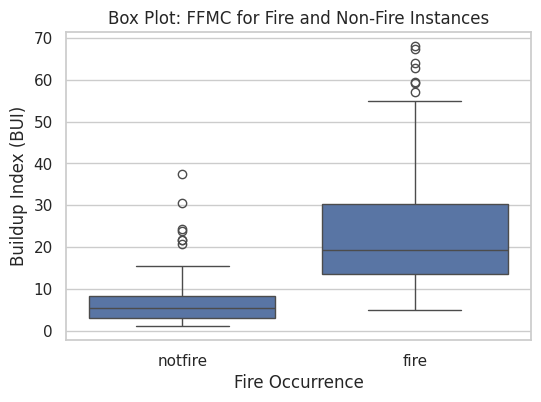

In [76]:
# Box Plot: FFMC for Fire and Non-Fire Instances
plt.figure(figsize=(6, 4))
sns.boxplot(x="Target", y="Buildup Index (BUI)", data=df)
plt.title("Box Plot: FFMC for Fire and Non-Fire Instances")
plt.xlabel("Fire Occurrence")
plt.ylabel("Buildup Index (BUI)")
plt.show()


Demonstration of the relation of buildup index and fire occurence. More build up = more fires.

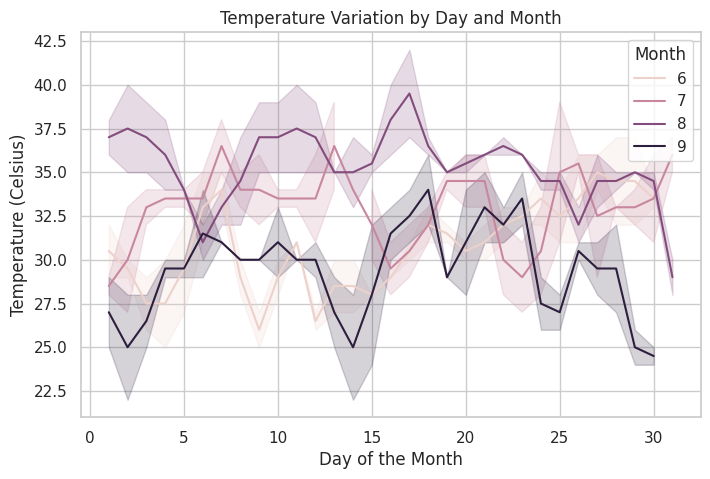

In [77]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="Day", y="Temp", hue="Month")
plt.title("Temperature Variation by Day and Month")
plt.xlabel("Day of the Month")
plt.ylabel("Temperature (Celsius)")
plt.legend(title="Month")
plt.show()

Here we can see the spikes in temperature for each day of the month, and based on that maybe be more prepared on these days.


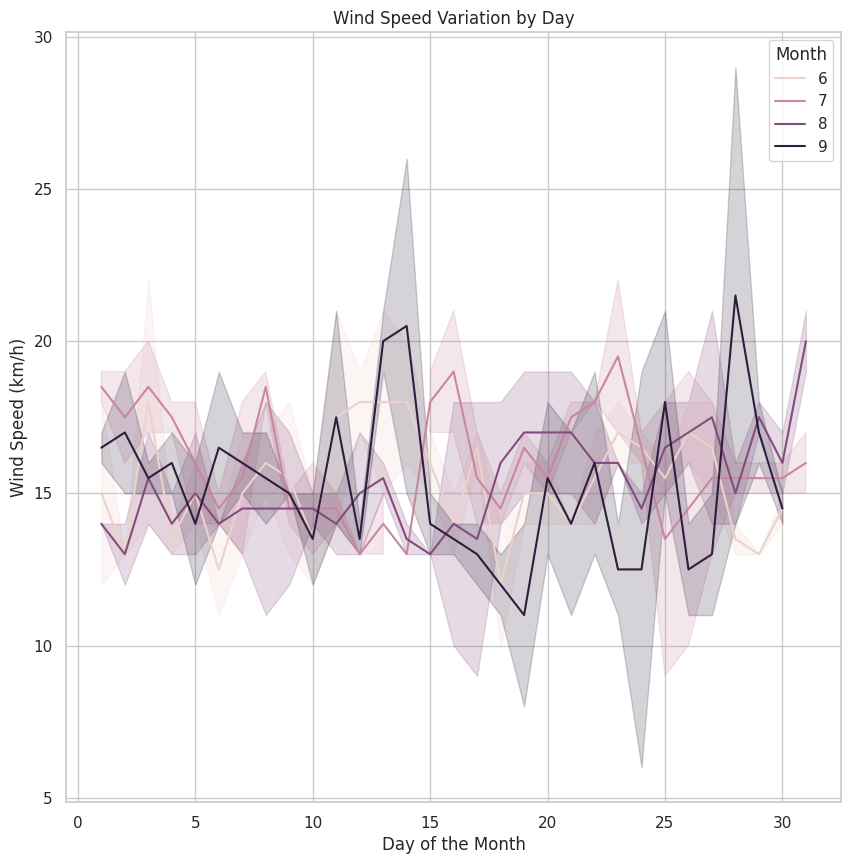

In [78]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df, x="Day", y="Ws",hue="Month")
plt.title("Wind Speed Variation by Day")
plt.xlabel("Day of the Month")
plt.ylabel("Wind Speed (km/h)")
plt.show()

Higher wind speeds can accelerate fire spread, making firefighting efforts more complex and necessitating timely warnings for public safety4. (paraphrase)

https://www.science.org.au/curious/earth-environment/things-you-need-know-about-bushfire-behaviour


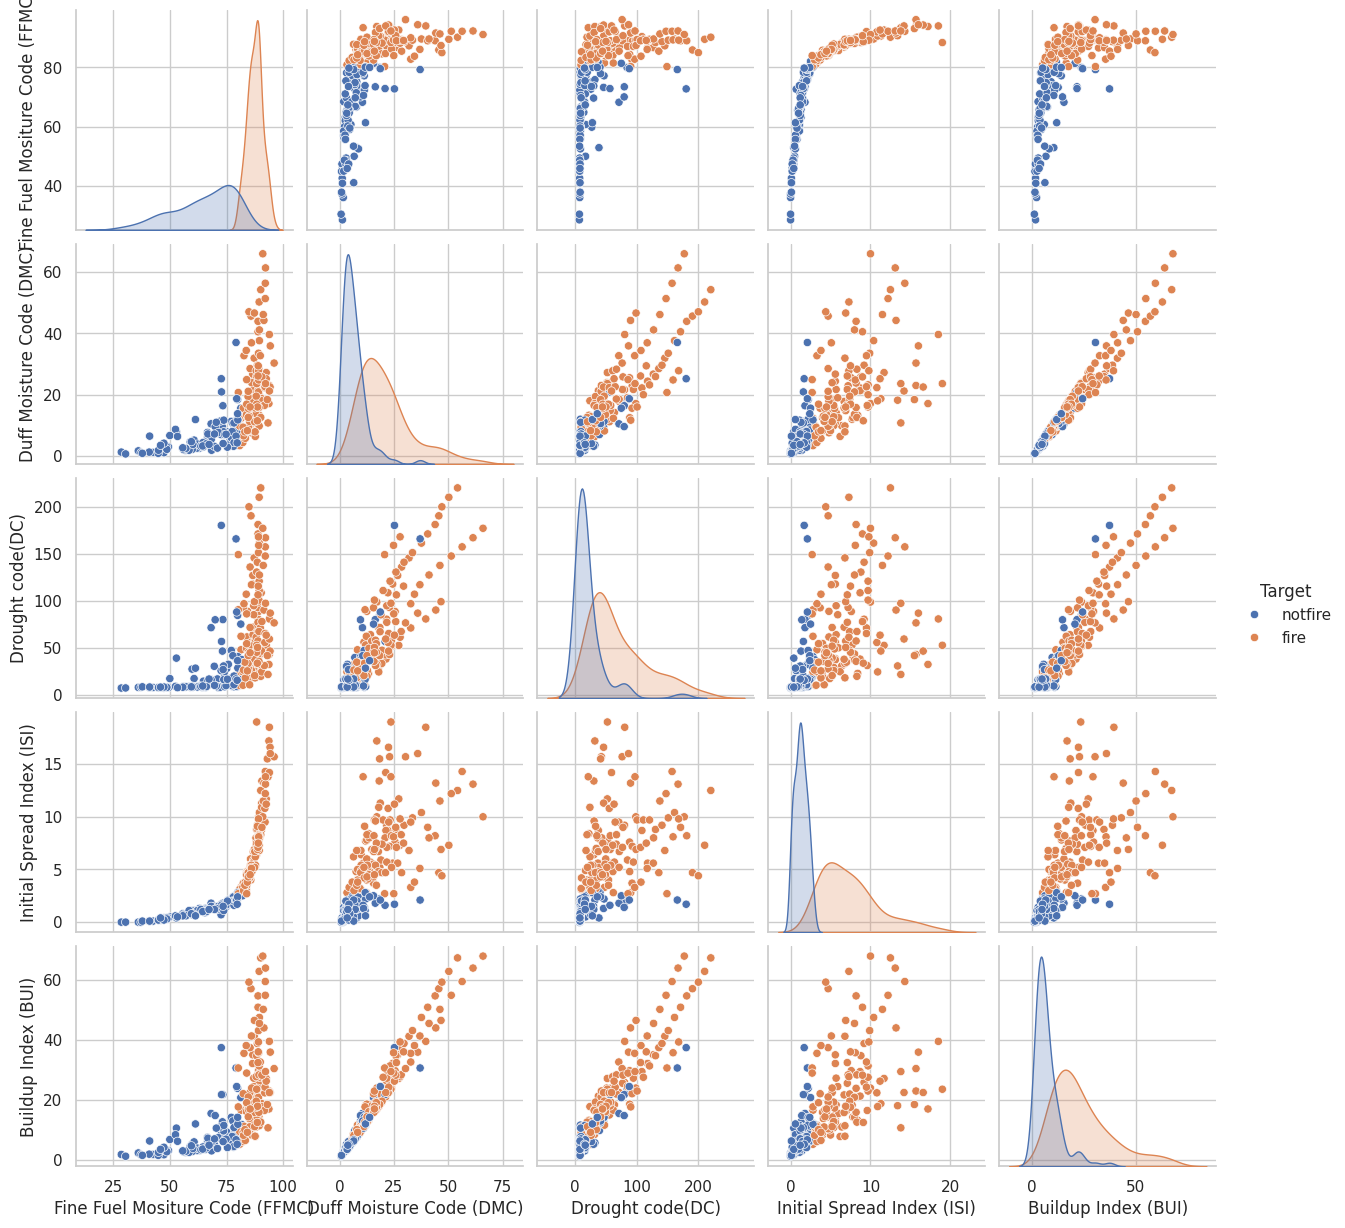

In [79]:


# Create a pair plot for DC, DMC, FFMC, BUI, FWI, and Target
sns.pairplot(df, hue="Target", vars=[
          'Fine Fuel Mositure Code (FFMC)',
          'Duff Moisture Code (DMC)', 'Drought code(DC)',
          'Initial Spread Index (ISI)', 'Buildup Index (BUI)'])

# Show the plot
plt.show()

There seems to be a prominant clustering of notFire data points in all of these scatter plots, and the location of the clusters is always near the (0,0). This is because these attributes mainly measure moisture level of different elements in the forest, so they are related. And mainly controled by the same factor : **Rain**


In [80]:
# Separate the target variable as that is a string
X = df.drop(columns=["Target"])
y = df["Target"]

# Standardize the features - essential step for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA model with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the PCA components
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Add the target variable back to the DataFrame
pca_df["Target"] = y

# Print the explained variance ratio
print(f"Explained variance ratio (PC1): {pca.explained_variance_ratio_[0]:.2f}")
print(f"Explained variance ratio (PC2): {pca.explained_variance_ratio_[1]:.2f}")

# Print the first few rows of the PCA DataFrame
print(pca_df.head())

Explained variance ratio (PC1): 0.49
Explained variance ratio (PC2): 0.15
        PC1       PC2   Target
0 -2.366220 -0.780364  notfire
1 -2.504188 -1.200041  notfire
2 -4.894710  2.529355  notfire
3 -4.491145  0.712504  notfire
4 -2.755973 -0.096694  notfire


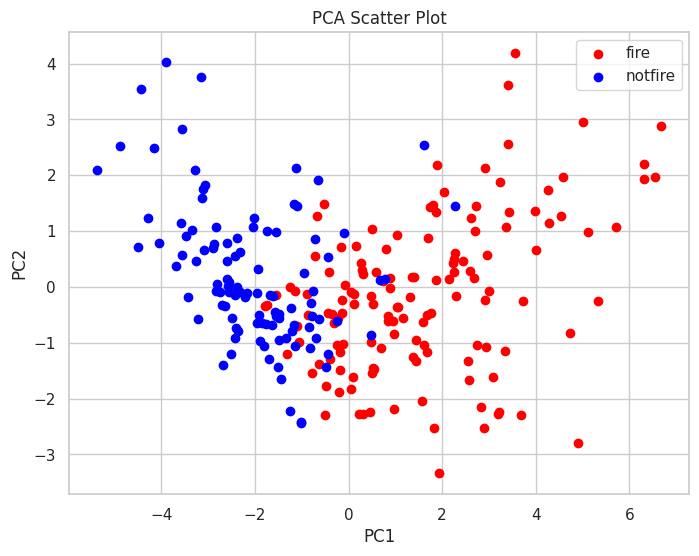

In [81]:
# Map target labels to colors
target_colors = {"fire": "red", "notfire": "blue"}

# Scatter plot
plt.figure(figsize=(8, 6))
for target_label, color in target_colors.items():
    subset_df = pca_df[pca_df["Target"] == target_label]
    plt.scatter(subset_df["PC1"], subset_df["PC2"], label=target_label, color=color)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot")
plt.legend()
plt.show()

It seems that there are alot of outliers from each category and both of the categories meet in the middle alot. The outliers may be explained by the total explained variance this data set has achieved PCA1 + PCA2 = 64%.




---

# Build the Model



Now that we are done with exploring the data and drawing the relations between the attributes.
We can now start building a model to predict a forest fire.
Since this is a classification problem
I am going to use logistic regression, and decision trees and confusion matrix to evaluate the model. I will split the data into two groups 80% for training and 20% for testing. This is so the model is being assessed on data it has not seen before.






In [82]:
numerical_features = ['Temp', 'RH', 'Ws', 'Rain', 'Fine Fuel Mositure Code (FFMC)', 'Duff Moisture Code (DMC)', 'Drought code(DC)', 'Initial Spread Index (ISI)', 'Buildup Index (BUI)', 'Fire Weather Index(FWI)']
categorical_features = ['Day', 'Month', 'Target']

# Create a new DataFrame for standardized features
df_standardized = df.copy()

# Standardize numerical features in the new DataFrame
scaler = StandardScaler()
# Set the seed to 1
np.random.seed(1)
df_standardized[numerical_features] = scaler.fit_transform(df_standardized[numerical_features])

# Display the new DataFrame with standardized features
df_standardized.head()

,Day,Month,Temp,RH,Ws,Rain,Fine Fuel Mositure Code (FFMC),Duff Moisture Code (DMC),Drought code(DC),Initial Spread Index (ISI),Buildup Index (BUI),Fire Weather Index(FWI),Target
0,1,6,-0.870655,-0.340673,0.893277,-0.381657,-0.847927,-0.912120,-0.879401,-0.830356,-0.936012,-0.880159,notfire
1,2,6,-0.870655,-0.070359,-0.888877,0.268642,-0.938709,-0.855520,-0.879401,-0.902720,-0.900798,-0.893626,notfire
2,3,6,-1.699254,1.348788,2.319000,6.171355,-2.146802,-0.984891,-0.889913,-1.071571,-0.985310,-0.934029,notfire
3,4,6,-1.975454,1.821837,-0.888877,0.868918,-3.438694,-1.081920,-0.894117,-1.143935,-1.055737,-0.947497,notfire
4,5,6,-1.423054,1.010896,0.180416,-0.381657,-0.910776,-0.944463,-0.740651,-0.854477,-0.900798,-0.880159,notfire


In [97]:
# Set a random seed for reproducibility
random_seed = 2

# Initialize train and test
X=df_standardized.drop('Target',axis=1)
y=df_standardized['Target']

# split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

All_train =X_train.join(y_train)

In [96]:
# Initialize train and test
X_PCA =pca_df.drop('Target',axis=1)
y_PCA=df_standardized['Target']
# split the data into train-test sets
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=random_seed)

All_train_PCA =X_train_PCA.join(y_train_PCA)

In [98]:
# Train logistic regression model on PCA AKA classification
model_PCA = LogisticRegression()
model_PCA.fit(X_train_PCA, y_train_PCA)

LogisticRegression()

In [99]:
# Train logistic regression model AKA classification
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

I standardized the data set here to fit it in the logisticRegression() , I needed to use feature scaling (standardization).Otherwise I get an error. It shouldnt affect the data in anyway though.




In [85]:
decision = DecisionTreeClassifier(random_state=2)
decision.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2)

In [86]:
decision_text = tree.export_text(decision,feature_names= list(X.columns))


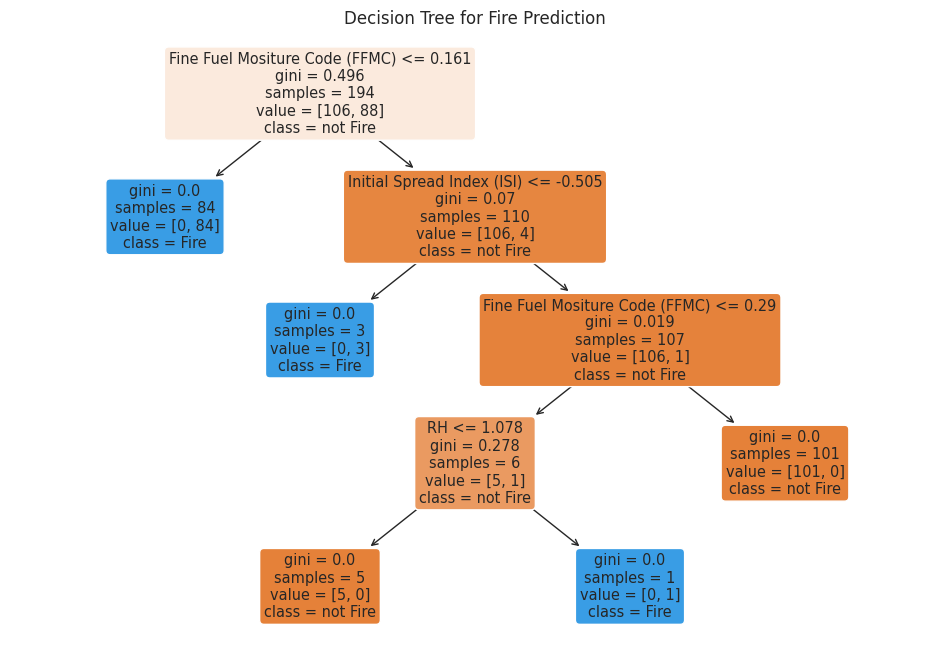

In [87]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision, feature_names=list(X.columns), class_names=['not Fire', 'Fire'], filled=True, rounded=True)
plt.title("Decision Tree for Fire Prediction")
plt.show()

This decision tree shows us the limit at which beyond  we will see the sample being classified as 'fire' and below as 'notfire'



# Discussion of Results:

In [88]:
# Count the number of 'fire' targets
num_fire_targets = sum(y_test == 'fire')
num_notfire_targets = sum(y_test == 'notfire')

# Print the result
print(f"Number of 'fire' targets in the test data: {num_fire_targets}")
print(f"Number of 'notfire' targets in the test data: {num_notfire_targets}")

Number of 'fire' targets in the test data: 31
Number of 'notfire' targets in the test data: 18


Confusion Matrix:
[[30  1]
 [ 0 18]]


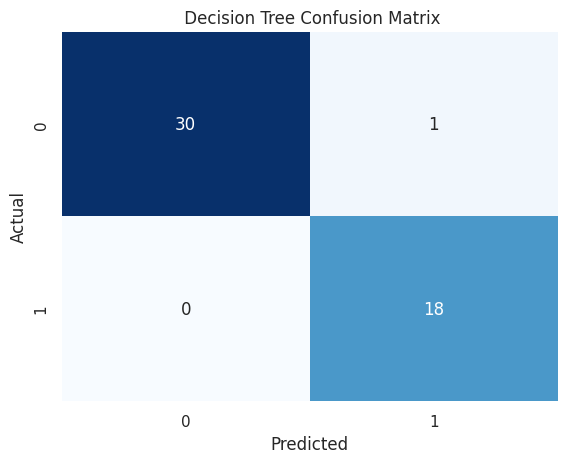

In [108]:
y_pred_dt = decision.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)



print(f"Confusion Matrix:\n{conf_matrix_dt}")


sns.heatmap(conf_matrix_dt, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title(" Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Confusion Matrix:
[[28  3]
 [ 0 18]]


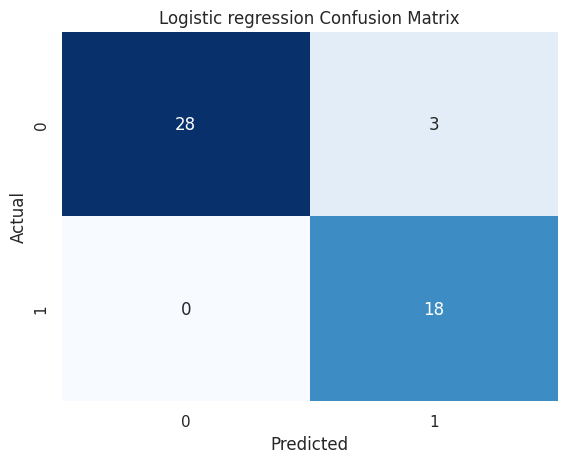

In [109]:
# Make predictions
y_pred_lr = model.predict(X_test)

# Evaluate model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)


print(f"Confusion Matrix:\n{conf_matrix_lr}")


# Plot confusion matrix

sns.heatmap(conf_matrix_lr, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Logistic regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Confusion Matrix:
[[28  3]
 [ 2 16]]


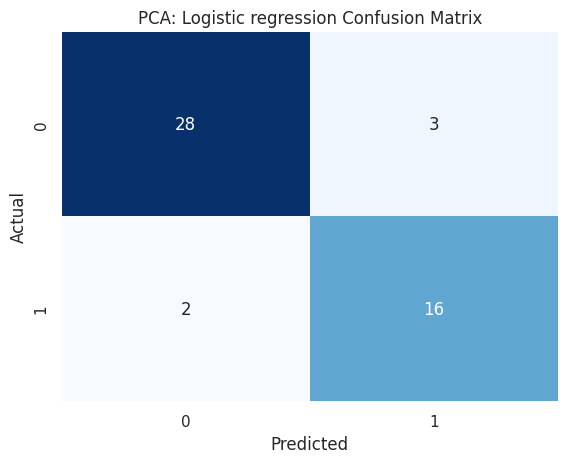

In [111]:
# Make predictions
y_pred_lr_PCA = model_PCA.predict(X_test_PCA)

# Evaluate model performance
accuracy_lr_PCA = accuracy_score(y_test_PCA, y_pred_lr_PCA)
conf_matrix_lr_PCA = confusion_matrix(y_test_PCA, y_pred_lr_PCA)
classification_rep_lr_PCA = classification_report(y_test_PCA, y_pred_lr_PCA)


print(f"Confusion Matrix:\n{conf_matrix_lr_PCA}")


# Plot confusion matrix

sns.heatmap(conf_matrix_lr_PCA, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("PCA: Logistic regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [112]:
print(f" Decision Tree Classification Report:\n{classification_rep_dt}")
print(f" Decision Tree Accuracy: {accuracy_dt:.2f}")

print(f"Logistic Regression Classification Report:\n{classification_rep_lr}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

print(f"PCA Logistic Regression Classification Report:\n{classification_rep_lr_PCA}")
print(f"PCA Logistic Regression Accuracy: {accuracy_lr_PCA:.2f}")

 Decision Tree Classification Report:
              precision    recall  f1-score   support

        fire       1.00      0.97      0.98        31
     notfire       0.95      1.00      0.97        18

    accuracy                           0.98        49
   macro avg       0.97      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49

 Decision Tree Accuracy: 0.98
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        fire       1.00      0.90      0.95        31
     notfire       0.86      1.00      0.92        18

    accuracy                           0.94        49
   macro avg       0.93      0.95      0.94        49
weighted avg       0.95      0.94      0.94        49

Logistic Regression Accuracy: 0.94
PCA Logistic Regression Classification Report:
              precision    recall  f1-score   support

        fire       0.93      0.90      0.92        31
     notfire       0.84      0.89      0.86 

# Conclusion:



I have set a random seed to make sure every time the notebook is run, we get the same numbers for the test for the discussion of results to be relevant to the observer. The scores were not consistent so for the purpose of this course work I will just analyze the result of the seed I have chosen.

Comparison:
Both models performed well (LR and DT without the LR with PCA), however the decision tree had a higher accuracy and F1 score. Based on this test I would much rather depend on the decision tree than the logistic regression model.

The PCA I made captured 64% of the variance ,though it retained enough information to get a 90% accuracy score which is only slightly worse and considerably good. This also says alot about the data set: We have alot of attributes who don't have a strong effect, however provide relavent patterns for the model which increases accuracy.

Based on the dangerousness of forest fires, I would much rather have a false positive for fires and have a perfect score for fire prediction. Then having the model predict there would not be a fire and it turns out to be a false negative. This would help areas prepare for a false warning at the cost of preparation, but at least there is not a fire for which they are not prepared.

I drew several connections in the exploratory analysis that really helped me understand a lot of things about the data set and forest fires, as well as understanding how some attributes change other attributes.

I believe that having an unbalanced data set impacted the performance of the model, because it is better trained to identify one than the other so it might misclassify the sample. Additionally, one more thing that I find to be a drawback to this model/analysis is that I am not an expert at that domain and data scientists usually work along with experts to consult them about additional features or considerations that I might not be able to point out in my analysis.




# Reference:

- Anon. Initial spread index. Retrieved April 26, 2024 from https://wikifire.wsl.ch/tiki-index4de6.html?page=Initial%2Bspread%2Bindex#:~:text=The%20ISI%20is%20finally%20obtained%20with%20the%20following
‌
- George E. Sakr, Imad H. Elhajj, George Mitri, and Uchechukwu C. Wejinya. 2010. Artificial intelligence for forest fire prediction. In 2010 IEEE/ASME International Conference on Advanced Intelligent Mechatronics, July 2010. IEEE, Montreal, QC, Canada, 1311–1316. https://doi.org/10.1109/AIM.2010.5695809

- Natural Resources Canada. Canadian wildland fire information system. Retrieved April 26, 2024 from https://cwfis.cfs.nrcan.gc.ca/home


- Tom Carruthers. 2017. Things you need to know about bushfire behaviour. (December 2017). Retrieved April 26, 2024 from https://www.science.org.au/curious/earth-environment/things-you-need-know-about-bushfire-behaviour